In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data set
uber_df = pd.read_csv('uberdrive.csv')

In [3]:
#first top 5 rows
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
#last 5 row
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
# Show the dimension of the dataset.
row,column = uber_df.shape

In [6]:
row

1156

In [7]:
column

7

In [8]:
# Show the size of the dataset.

uber_df.size

8092

In [ ]:
# Print the information about all the variables of the data set.

uber_df.info()

In [10]:
# Check for missing values.

uber_df.isna().values.any()

True

In [ ]:
# How many missing values are present?

uber_df.isna().sum()

In [ ]:
# Get the initial data (name it 'df') with dropping the NA values

df = uber_df.dropna()
df.isna().values.any()
df

In [ ]:
# Get the summary of the original data (before dropping the 'na' values).
uber_df.describe()

In [ ]:
# heck the information of the new dataframe.
df.describe()

In [15]:
# Get the unique start destinations

un_start_df = uber_df['START*'].unique()

In [ ]:
set(un_start_df)

In [17]:
# Get the unique start destinations

un_start_destination = uber_df['START*'].dropna()

In [ ]:
un_start_destination

In [19]:
unique_star = set(un_start_destination)

In [ ]:
unique_star

In [ ]:
uber_df['START*'].drop_duplicates()

In [ ]:
# What is the total number of unique start destinations?
len(unique_star)

In [23]:
# Print the total number of unique stop destinations
un_start_stop = uber_df['STOP*'].dropna()

In [ ]:
len(set(un_start_stop))

In [26]:
# Print all the Uber trips that has the starting point of San Francisco.
# uber_df[uber_df['START*'] == 'San Francisco']

#or
uber_df.loc[uber_df['START*'] == 'San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [27]:
#  What is the most popular starting point for the Uber drivers

starting_point = uber_df['START*'].dropna()

In [63]:
starting_point.value_counts().sort_values(ascending=False).reset_index().loc[0]

index     Cary
START*     201
Name: 0, dtype: object

In [62]:
#  What is the most popular starting point for the Uber drivers

#another way

starting_point = uber_df['START*'].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(['START*'],ascending = False)
df = df.reindex()
df = df.rename(columns={'index' : 'Starting_Destination','START*':'COUNT'})
df.loc[df['COUNT'] == max(df['COUNT'])]

,COUNT
Cary,201


In [25]:
#  What is the most popular dropping point for the Uber drivers

In [64]:
starting_point = uber_df['STOP*'].dropna()
starting_point.value_counts().sort_values(ascending=False).reset_index().loc[0]

index    Cary
STOP*     203
Name: 0, dtype: object

In [65]:
# List the most frequent route taken by Uber drivers.
df = uber_df.dropna()

In [67]:
df = df.groupby(['START*','STOP*'])

In [115]:
df = uber_df.dropna()
df = pd.DataFrame( df.groupby(['START*','STOP*']).size())
df = df.rename(columns={0:'Counts'})
df = df.sort_values(['Counts'],ascending= False)
df.head(1)

,,Counts
START*,STOP*,
Cary,Morrisville,52


In [111]:
df.iloc[df['Counts']]= max(df['Counts'])

In [112]:
df

Counts
START*           STOP*                   
Cary             Morrisville           52
Morrisville      Cary                  52
Cary             Cary                  52
Unknown Location Unknown Location      52
Cary             Durham                52
...                                   ...
Katunayaka       Katunayaka             1
                 Unknown Location       1
Katunayake       Gampaha                1
Katy             Houston                1
Winston Salem    Asheville              1

[239 rows x 1 columns]

In [120]:
# Print all types of purposes for the trip in an array.
uber_df['PURPOSE*'].ravel()

array(['Meal/Entertain', nan, 'Errand/Supplies', ..., 'Temporary Site',
       'Temporary Site', nan], dtype=object)

In [133]:
df = uber_df['PURPOSE*'].dropna().unique().ravel()

In [134]:
df

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

In [137]:
uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum()

PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

<Axes: xlabel='PURPOSE*'>

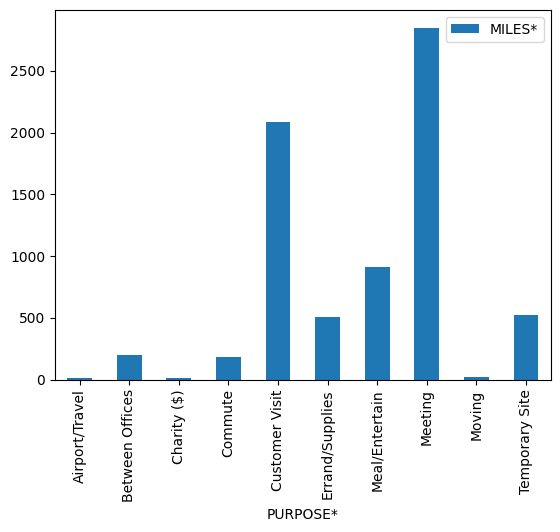

In [146]:
# Plot a bar graph of Purposes vs Distance.
df = pd.DataFrame(uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum())
df.plot(kind='bar')


<Axes: xlabel='MILES*', ylabel='PURPOSE*'>

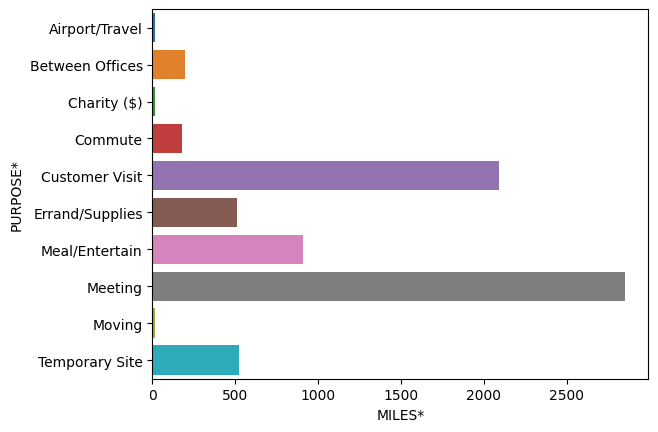

In [147]:
# Print a dataframe of Purposes and the distance travelled for that particular Purpose.
df =df.reset_index()
sns.barplot(x = df['MILES*'],y = df['PURPOSE*'])

In [148]:
# Plot number of trips vs Category of trips.
df

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


In [152]:
df = uber_df['CATEGORY*'].reset_index()

In [157]:
df = df['CATEGORY*'].value_counts()

<Axes: >

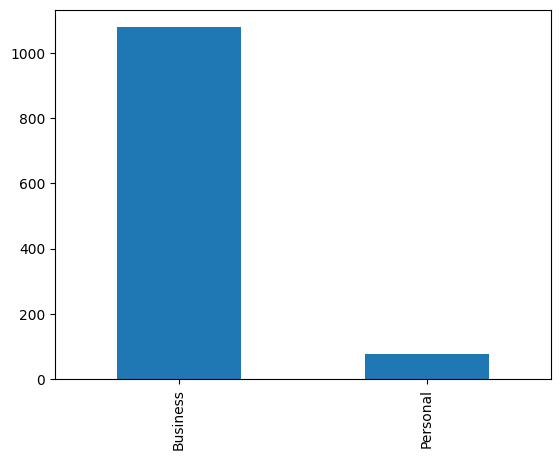

In [158]:
df.plot(kind='bar')

In [159]:
# What is proportion of trips that is Business and what is the proportion of trips that is Personal?
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [185]:
df = uber_df.groupby(['CATEGORY*']).sum()
Business = df.iloc[0,0]/(df.iloc[0,0] + df.iloc[1,0])
Personal = df.iloc[1,0]/(df.iloc[1,0] + df.iloc[0,0])

print('Business' , Business)
print('Personal' , Personal)

Business 0.9411947856153776
Personal 0.058805214384622315


<ipython-input-185-56179e3c1008>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = uber_df.groupby(['CATEGORY*']).sum()


In [173]:
Business = df.iloc[0,0]/(df.iloc[0,0] + df.iloc[1,0])

In [174]:
Business

0.9411947856153776

In [175]:
df.iloc[1,0]

717.7

In [179]:
Personal = df.iloc[1,0]/(df.iloc[1,0] + df.iloc[0,0])

In [180]:
Personal

0.058805214384622315

In [182]:
df

,MILES*
CATEGORY*,
Business,11487.0
Personal,717.7
